Task_02 => Implement a support vector machine to classify images of cats and dogs from a given dataset.
Dataset link => 'https://www.kaggle.com/c/dogs-vs-cats/data'

In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import joblib
import zipfile
import random

In [8]:
# STEP 2: Load Images from Zip Files
def load_images_from_zip(zip_path, image_size=(64, 64)):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        images = []
        labels = []
        filenames = []
        for file in file_list:
            if file.endswith('/'):
                continue
            try:
                with zip_ref.open(file) as img_file:
                    img = Image.open(img_file)
                    img = img.resize(image_size)
                    img = img.convert('RGB')
                    img = np.array(img)
                    if img.shape == (*image_size, 3):  # Ensure image is in the correct shape
                        images.append(img.flatten())
                        filenames.append(file)
                        if 'cat' in file:
                            labels.append(0)
                        elif 'dog' in file:
                            labels.append(1)
            except Exception as e:
                print(f"Error loading image {file}: {e}")
                continue
        return np.array(images), np.array(labels), filenames

# Load training data
train_zip_path = 'train.zip'
X_train, y_train, _ = load_images_from_zip(train_zip_path)
print(f"Loaded {X_train.shape[0]} training images.")

# Load testing data
test_zip_path = 'test.zip'
X_test, _, test_filenames = load_images_from_zip(test_zip_path)
print(f"Loaded {X_test.shape[0]} testing images.")

Loaded 25000 training images.
Loaded 12500 testing images.


Displaying sample training images:


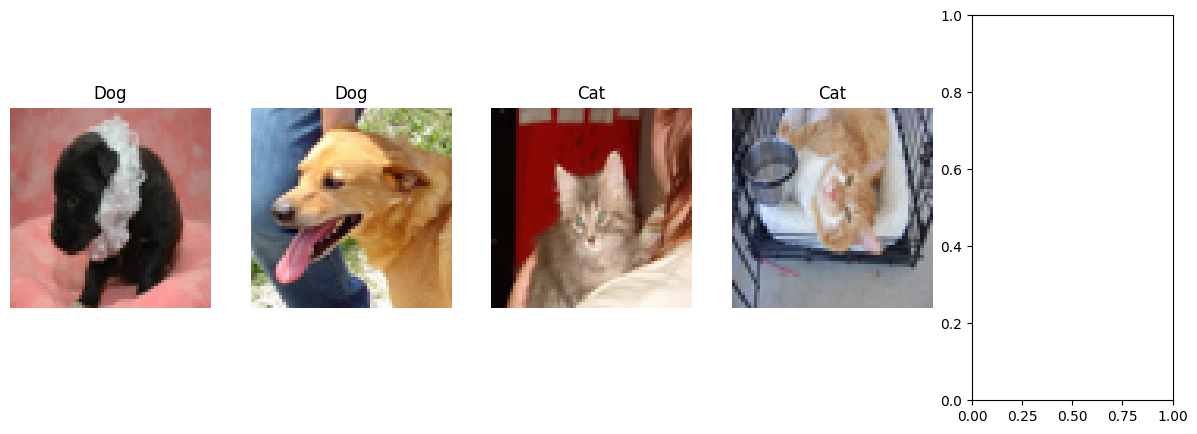

In [9]:
# STEP 3: Display Sample Training Images
def display_sample_images(images, labels, n=5):
    cat_indices = [i for i, label in enumerate(labels) if label == 0]
    dog_indices = [i for i, label in enumerate(labels) if label == 1]

    # Select n//2 random cats and n//2 random dogs
    random_cat_indices = random.sample(cat_indices, n // 2)
    random_dog_indices = random.sample(dog_indices, n // 2)

    # Combine and shuffle the selected indices
    selected_indices = random_cat_indices + random_dog_indices
    random.shuffle(selected_indices)

    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, index in enumerate(selected_indices):
        ax = axes[i]
        img = images[index].reshape(64, 64, 3)
        ax.imshow(img)
        ax.set_title('Cat' if labels[index] == 0 else 'Dog')
        ax.axis('off')
    plt.show()

print("Displaying sample training images:")
display_sample_images(X_train, y_train)

In [10]:

# Reduce dataset size for quicker training
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.2, stratify=y_train, random_state=42)
X_test_small, _, test_filenames_small, _ = train_test_split(X_test, test_filenames, train_size=0.2, random_state=42)

# Apply PCA to reduce dimensions
pca = PCA(n_components=100)
X_train_reduced = pca.fit_transform(X_train_small)
X_test_reduced = pca.transform(X_test_small)


In [11]:
# STEP 5: Train the SVM Model
# Create a pipeline with a scaler and the SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the classifier
print("Training the SVM model...")
clf.fit(X_train_reduced, y_train_small)
print("Training completed.")


Training the SVM model...
Training completed.


Making predictions on the test data...
Displaying sample prediction results:


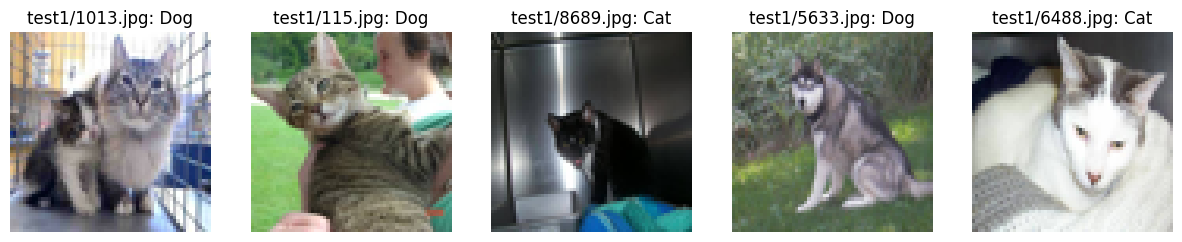

In [14]:
# Make predictions on the test data  and Display Results
print("Making predictions on the test data...")
y_pred = clf.predict(X_test_reduced)

# Output predictions for a few test images
def display_prediction_results(images, filenames, predictions, n=5):
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax = axes[i]
        img = images[i].reshape(64, 64, 3)
        ax.imshow(img)
        ax.set_title(filenames[i] + ': ' + ('Dog' if predictions[i] == 1 else 'Cat'))
        ax.axis('off')
    plt.show()

print("Displaying sample prediction results:")
display_prediction_results(X_test_small, test_filenames_small, y_pred)


In [16]:
# Save the model
joblib.dump(clf, 'svm_dog_cat_classifier.pkl')
print("Model saved to 'svm_dog_cat_classifier.pkl'.")

# Load the model
clf = joblib.load('svm_dog_cat_classifier.pkl')
print("Model loaded from 'svm_dog_cat_classifier.pkl'.")

Model saved to 'svm_dog_cat_classifier.pkl'.
Model loaded from 'svm_dog_cat_classifier.pkl'.
